In [ ]:
#Importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [14]:
#Importing data
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [15]:
df.shape

(11251, 15)

In [16]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [18]:
#Dropping blank columns
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [20]:
#Checking for null values
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [21]:
#Dropping null values
df.dropna(inplace=True)

In [23]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [26]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

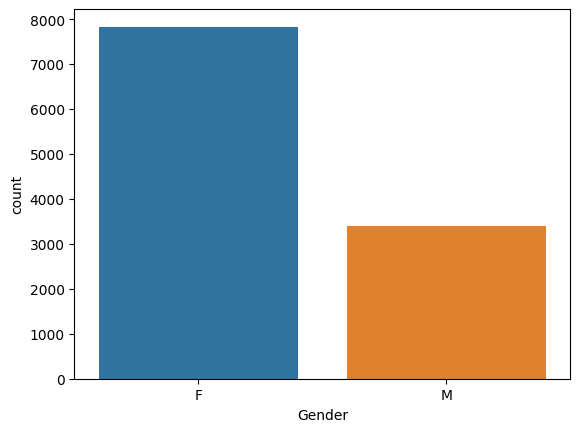

In [27]:
ax = sns.countplot(x='Gender', data=df)       

#Female Buyers > Male Buyers

<Axes: xlabel='Gender', ylabel='Amount'>

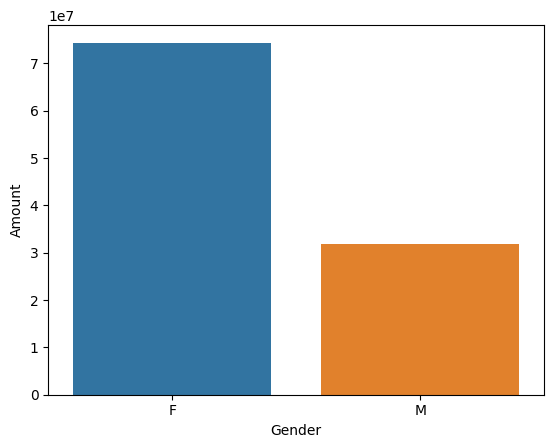

In [28]:
gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Gender', y='Amount', data = gen)

#Amt spent on purchase is greater for females

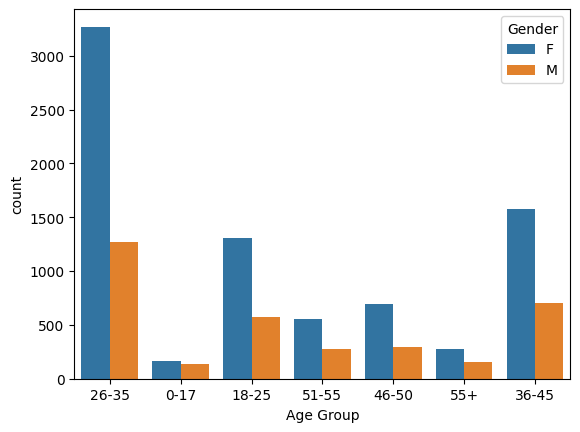

In [29]:
ax = sns.countplot(data=df, x='Age Group', hue = 'Gender')

#Max Buyers in the age 26-35

<Axes: xlabel='Age Group', ylabel='Amount'>

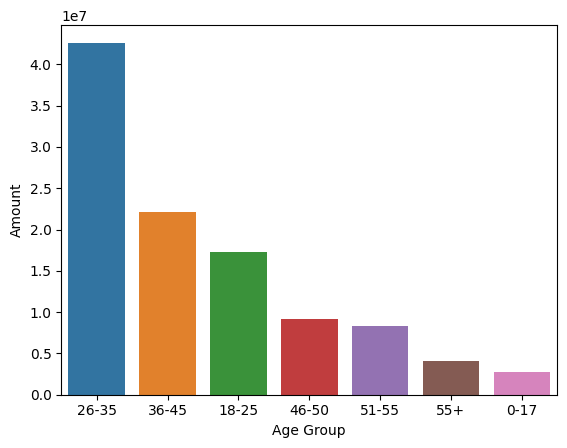

In [31]:
age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.barplot(x='Age Group', y='Amount', data = age)

#Max Amt spent by people b/w age 26-35

<Axes: xlabel='State', ylabel='Orders'>

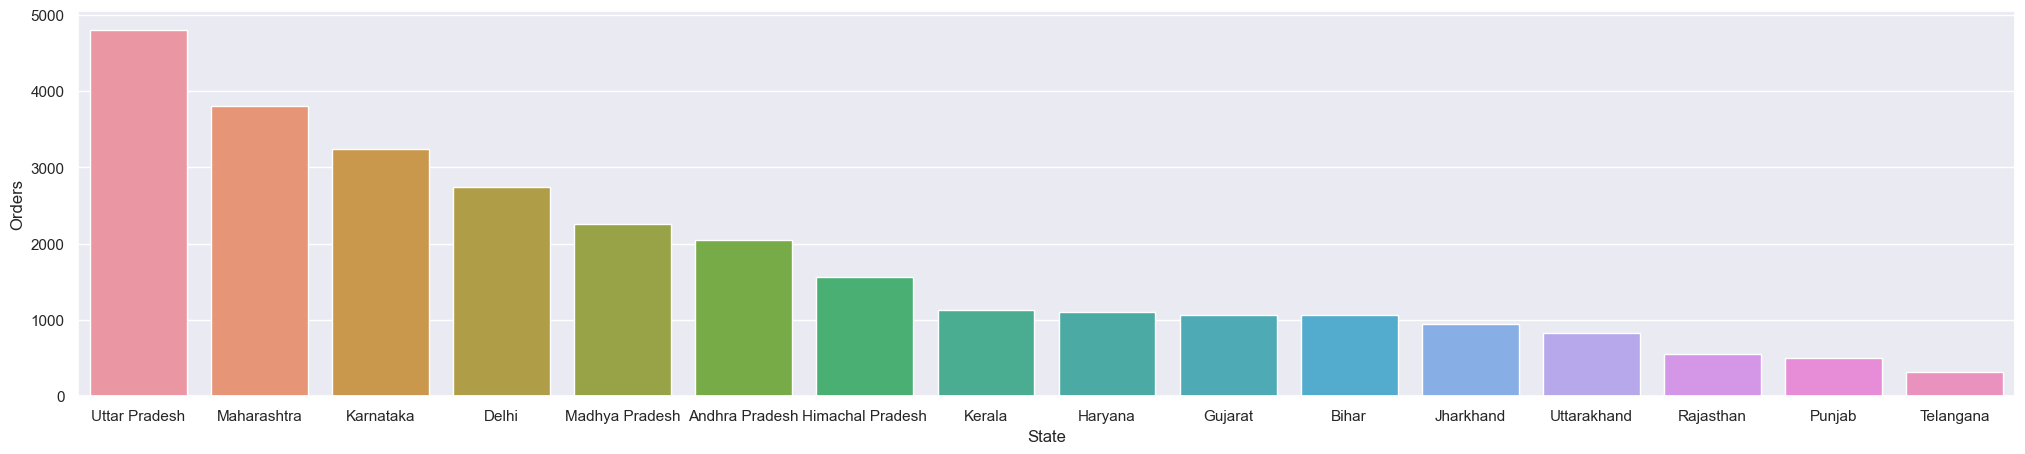

In [39]:
ord = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State', y='Orders', data = ord)

#UP has received max no of orders

<Axes: xlabel='State', ylabel='Amount'>

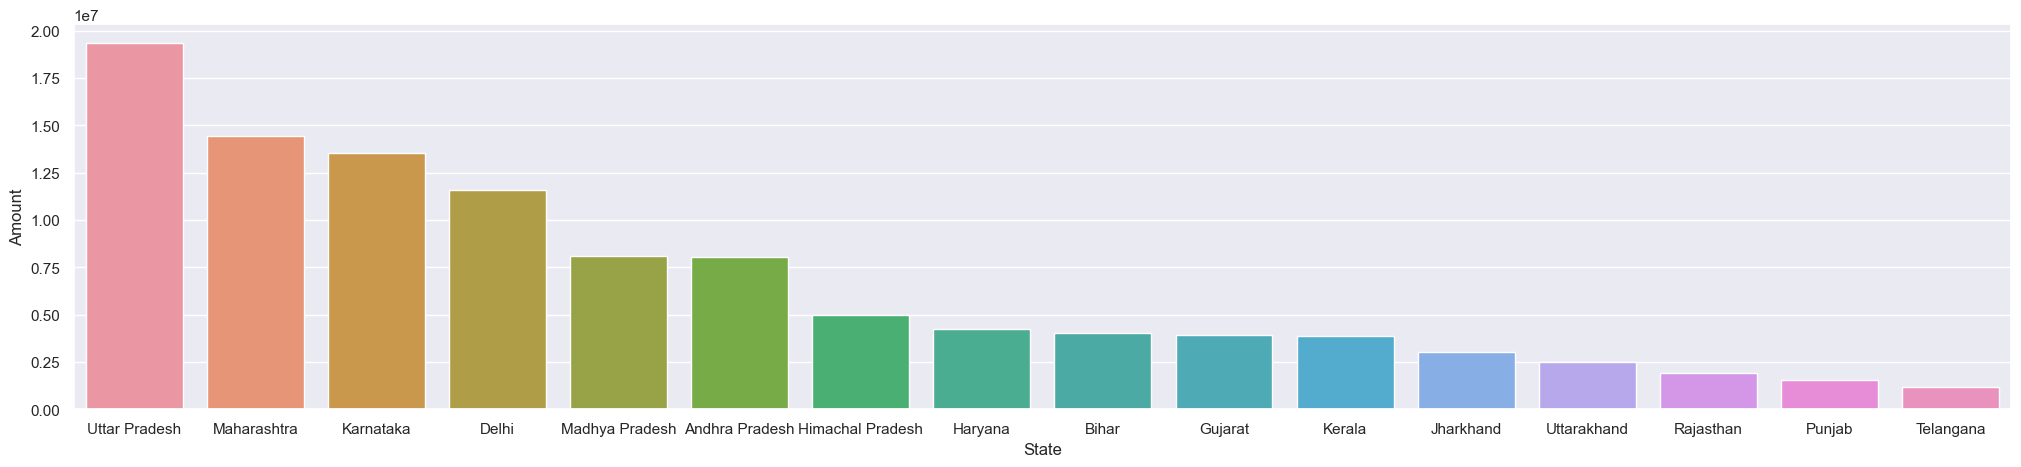

In [40]:
state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(25,5)})
sns.barplot(x='State', y='Amount', data = state)

#UP has spent the max amt

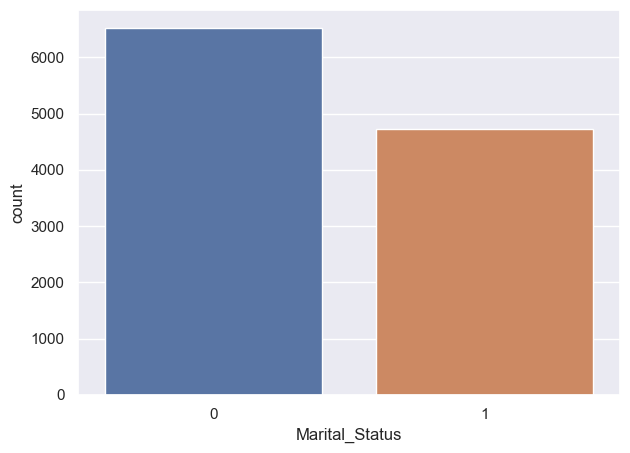

In [44]:
ax = sns.countplot(data=df, x='Marital_Status')
sns.set(rc={'figure.figsize':(8,5)})

#Married people have shopped more compared to unmarried people

<Axes: xlabel='Marital_Status', ylabel='Amount'>

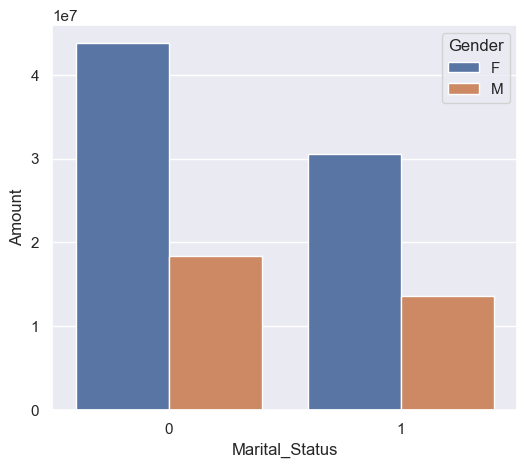

In [45]:
stat = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(x='Marital_Status', y='Amount', data = stat, hue = 'Gender')

#Amt spent by married females is the maximum

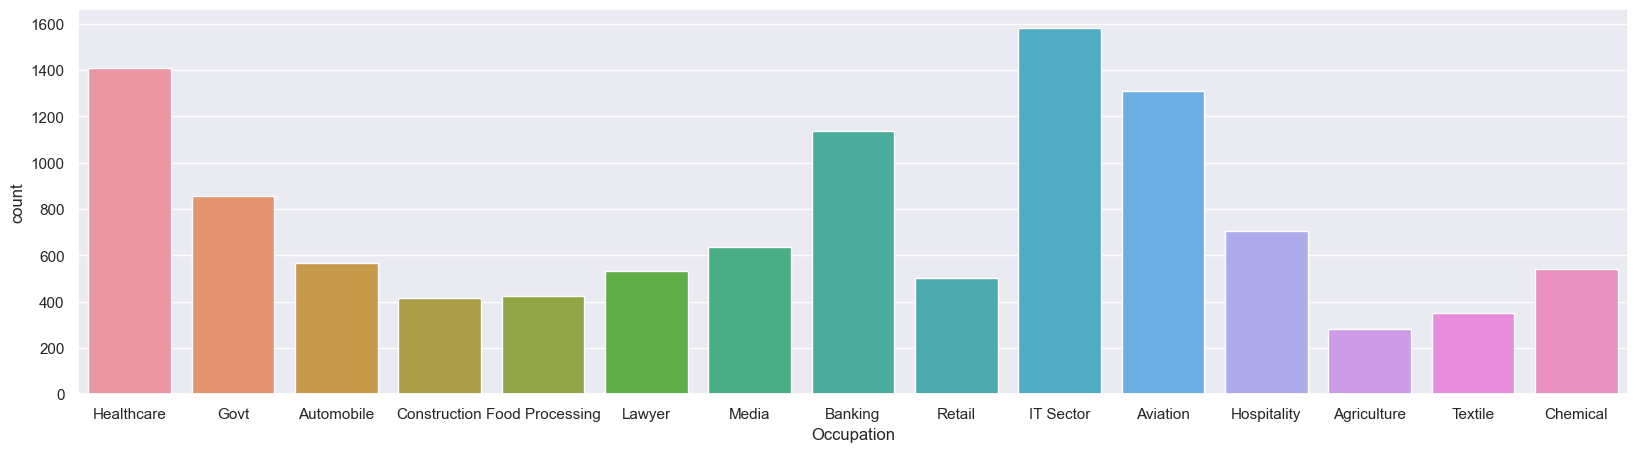

In [48]:
ax = sns.countplot(data=df, x='Occupation')
sns.set(rc={'figure.figsize':(20,5)})

#People belonging to IT Sectors have made max purchases

<Axes: xlabel='Occupation', ylabel='Amount'>

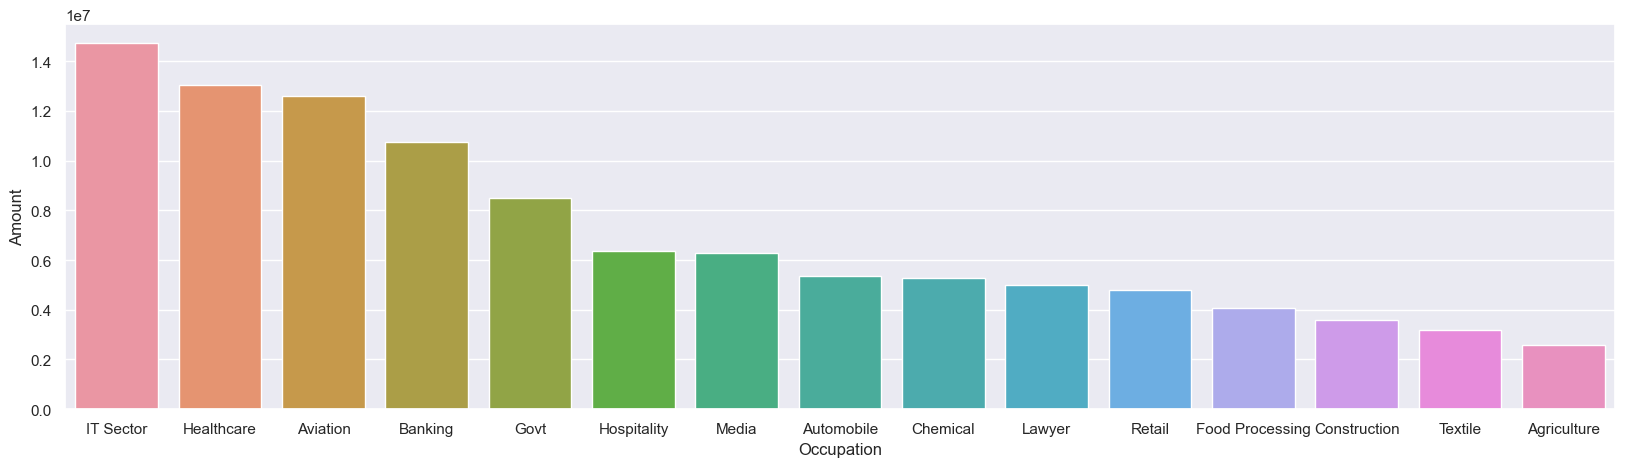

In [50]:
occ = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='Occupation', y='Amount', data = occ)

#People belonging to IT Sectors have spent the max amt

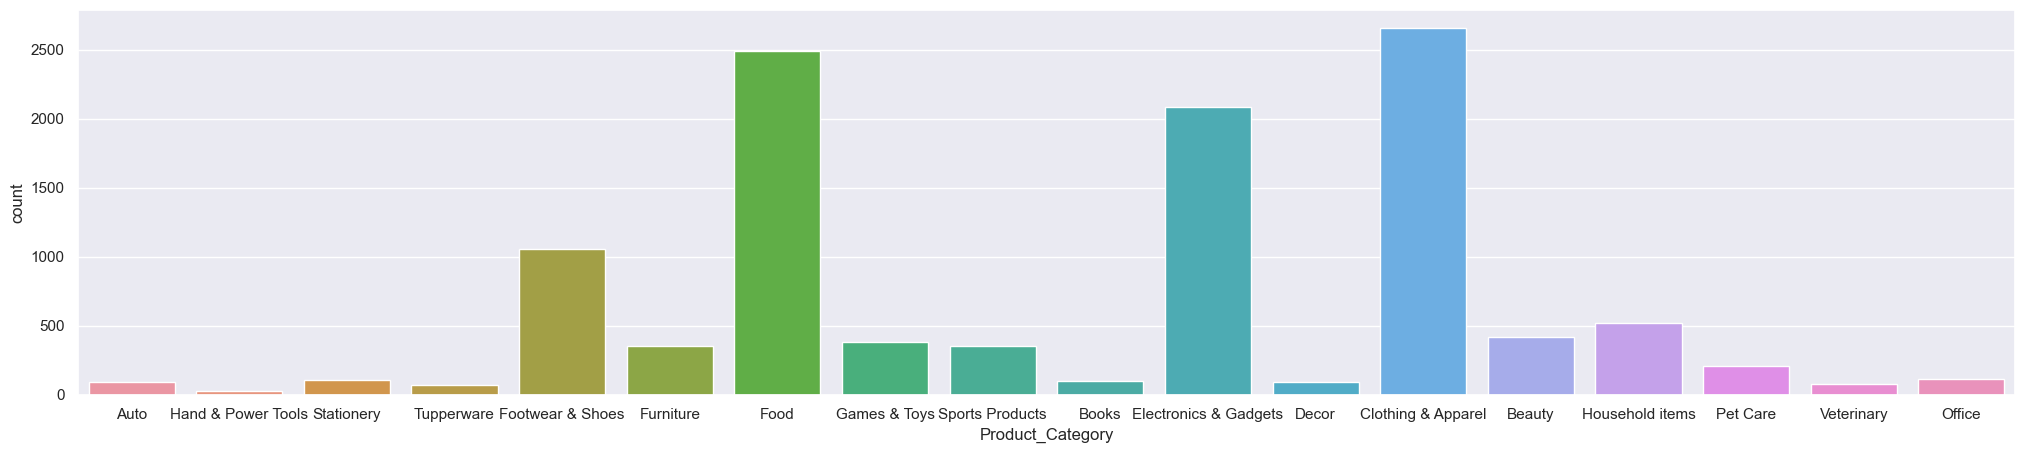

In [53]:
ax = sns.countplot(data=df, x='Product_Category')
sns.set(rc={'figure.figsize':(28,5)})

#Clothing & Apparel has been the most sold category in terms of items

<Axes: xlabel='Product_Category', ylabel='Amount'>

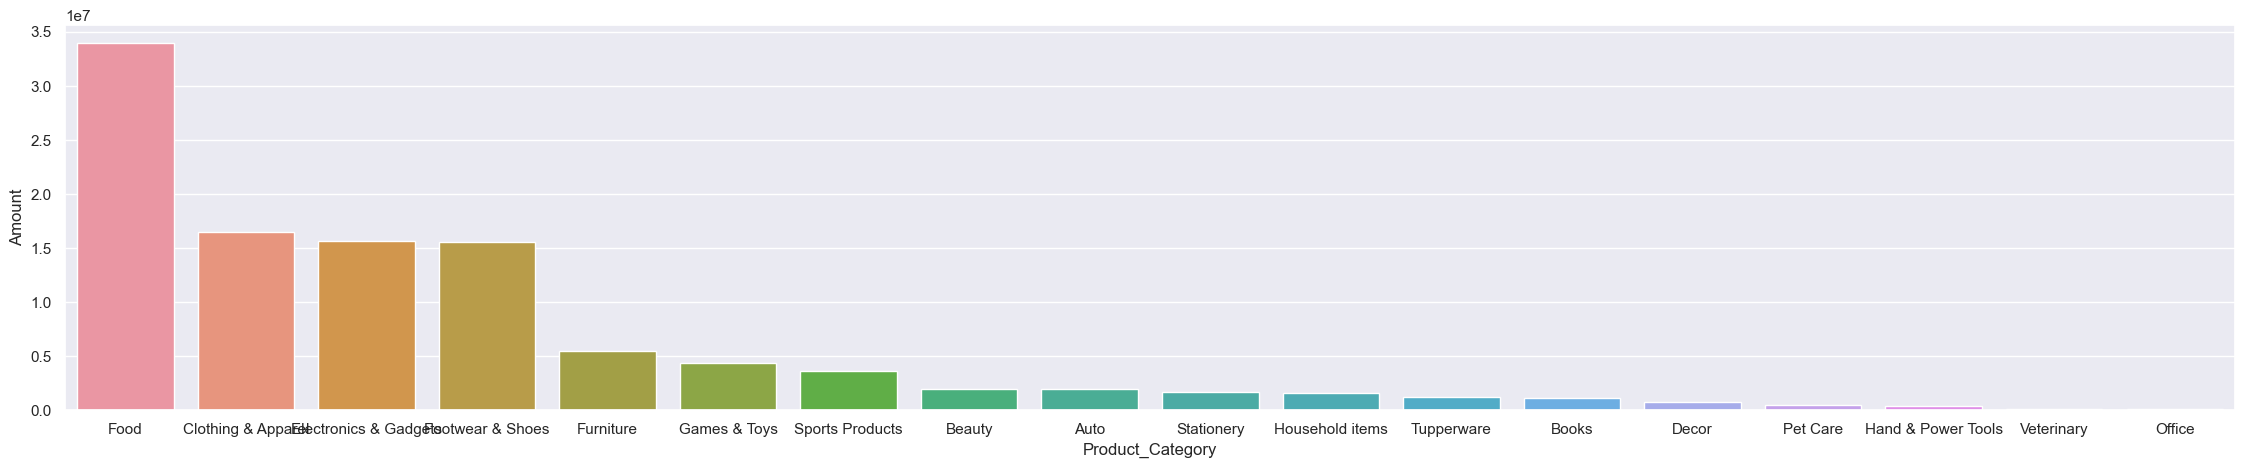

In [54]:
cat = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(28,5)})
sns.barplot(x='Product_Category', y='Amount', data = cat)

#Max amt has bee spent on Food

Conclusion:-

Married women b/w the age 26-35 belonging to state UP working in IT Industry purchasing Food & Clothing has been the most common order.